# Project 3 - Neural Networks

In [16]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler # for scaling

import matplotlib.pyplot as plt # helps draw graphs
import numpy as np # handles multiple numbers

from sklearn.neural_network import MLPClassifier # Multi-Layer Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay # for plotting performance

from sk_visualisation_helpers import plot_contour

In [17]:
X_train, y_train = make_moons(
    n_samples=8000, 
    noise=0.1, 
    random_state=42
) # Training set - teaching AI
X_test, y_test = make_moons(
    n_samples=2000, 
    noise=0.15, 
    random_state=42
) # Testing set - assessing AI

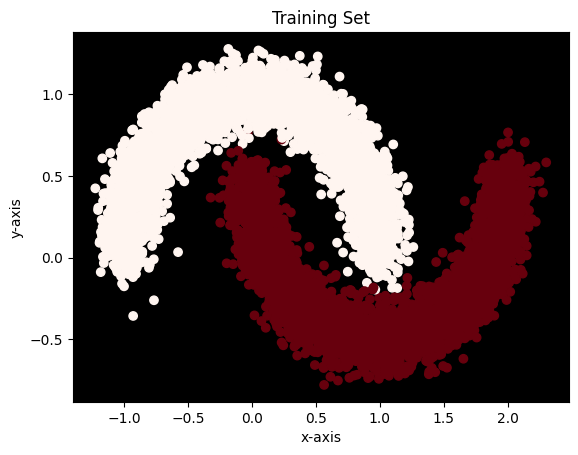

In [18]:
plt.gca().set_facecolor("black") # set graph background colour
plt.scatter(
    x = X_train[:,0],
    y = X_train[:,1],
    c = y_train,
    cmap = "Reds", # colour map - group of set colours to use
    alpha = 1 # opacity (how bright/strong a colour is)
)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("Training Set")
plt.show()

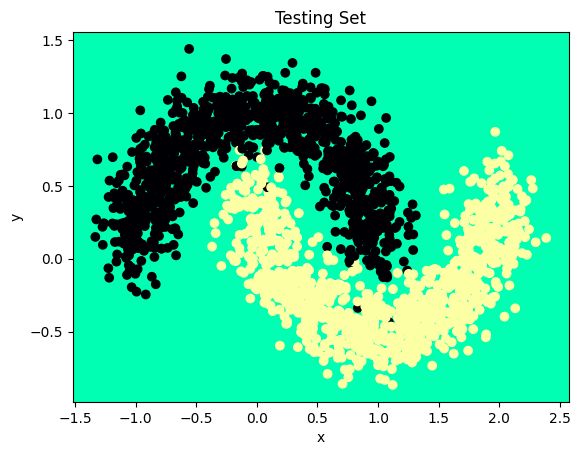

In [19]:
plt.gca().set_facecolor("#00FFB3")
plt.scatter(
    x = X_test[:,0],
    y = X_test[:,1],
    c = y_test,
    cmap = "inferno"
)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Testing Set")
plt.show()

## Preprocessing

- **Preprocessing**: The steps taken to clean and prepare raw data before using it a model.
    - E.g. removing missing values, converting text/images into numbers, or scaling values.
- **Scaling**: adjusting numerical features so they share a similar range, helping models learn more effectively.
    - E.g. Converting heights from 0-200cm to a smaller range like 0-1
    - **Standard Scaler**: centers data around the mean and scales it using the standard deviation
        - **Formula**: (value-mean)/standard deviation
    - **Min-Max Scaling**: rescales values to between 0 and 1
    - **Robust Scaling**: uses median and interquartile range (IQR), reducing the impact of outliers.
- **Normalising**: A type of scaling that transforms data so values fall between 0 and 1 (or between -1 and 1)

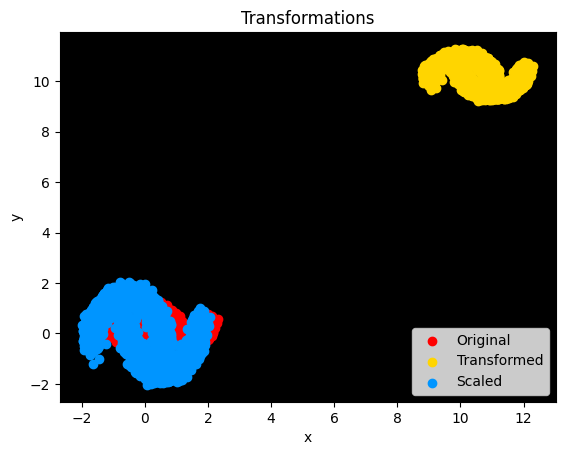

In [20]:
plt.scatter(
    x = X_train[:,0], # x-axis - horizontal
    y = X_train[:,1], # y-axis - vertical
    c = "#FF0000",
    label = "Original"
)

X_train_ten = X_train + 10 # add 10 to all of the data in the training set
plt.scatter(
    x = X_train_ten[:,0],
    y = X_train_ten[:,1],
    c = "#FFD500",
    label = "Transformed"
)

scaler = StandardScaler()
scaler.fit(X_train) # let the scaler identify patterns and how much to scale
X_train = scaler.transform(X_train)
plt.scatter(
    x = X_train[:,0],
    y = X_train[:,1],
    c = "#0095FF",
    label = "Scaled"
)

plt.gca().set_facecolor("black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Transformations")
plt.legend(loc = "lower right")
plt.show()

---

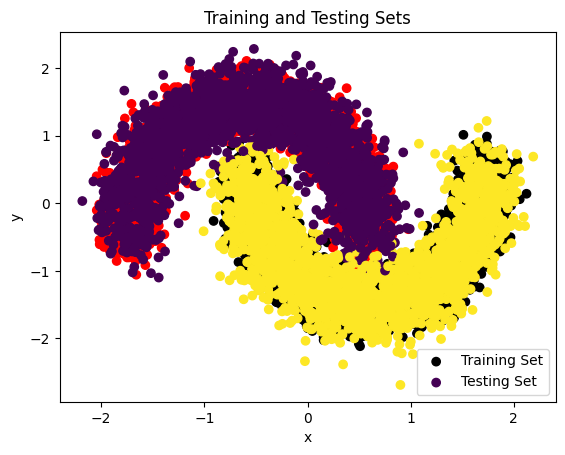

In [21]:
X_train, y_train = make_moons(
    n_samples = 16000,
    noise = 0.1,
    random_state = 42
)

X_test, y_test = make_moons(
    n_samples = 4000,
    noise = 0.15,
    random_state = 42
)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

plt.scatter(
    x = X_train[:,0],
    y = X_train[:,1],
    c = y_train,
    cmap = "flag",
    label = "Training Set"
)

plt.scatter(
    x = X_test[:,0],
    y = X_test[:,1],
    c = y_test,
    cmap = "viridis",
    label = "Testing Set"
)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Training and Testing Sets")
plt.legend(loc = "lower right") # legend - displays keys for the colours
plt.show()

## Statistics

- **Statistics**: the study of collecting, analysing and interpreting data
    - They help models understand patterns and make predictions
- **Data**: information used to train and evaluate the AI.
    - **Numerical Data**: data in the form of numbers, e.g. score, time, weight, height, age
    - **Categorical Data**: data in the form of labels or groups, e.g. colours, gender, ethnicity

In [22]:
data = np.array([1,2,3,4,5,6,7,8,9,10])

- **Mean**: the average of a dataset, calculated by adding all the numbers and divided by the total amount of numbers
    - **What it represents**: central value of the data

In [ ]:
mean = np.mean(data)
print(f"The mean of the data is {mean:.2f}")

5.5


- **Mode**: value that appears most often in the data.
- **Median**: number in the middle of the ordered dataset
    - In the case of even amount of data, get the average (mean) between middle 2 values.

In [24]:
median = np.median(data)
print(median)

5.5


- **Standard Deviation**: a measure of how spread out the values are from the mean
    - low std -> values are close to the mean
    - high std -> values are far away from the mean

- **Variance**: the square of the standard deviation.
    - measures how much the data varies from the mean

In [25]:
std = np.std(data)
print(std)

variance = np.var(data)
print(variance)

2.8722813232690143
8.25


- **Minimum**: The number with the least value.
- **Maximum**: The number with the greatest value.

In [26]:
min_val  = np.min(data)
max_val = np.max(data)

print(f"Minimum: {min_val}     Maximum: {max_val}")

Minimum: 1     Maximum: 10


- **Range**: difference between the biggest and smallest values in the dataset.
- **Outliers**: data which does not apply to the correlation, so an anomaly
    - This can negatively affect model performance

In [27]:
data_range = np.max(data) - np.min(data)
print(data_range)

outliers = data[np.abs(data - mean) > 2*std]
print(outliers)

9
[]


- **Quartiles**: divide a dataset into 4 equal parts, containing 25% of the data
    - **Q1**: first/lower quartile - value below which 25% of the data falls.
    - **Q2**: second/median quartile - value below which 50% of the data falls.
    - **Q3**: third/upper quartile - value below which 75% of the data falls.

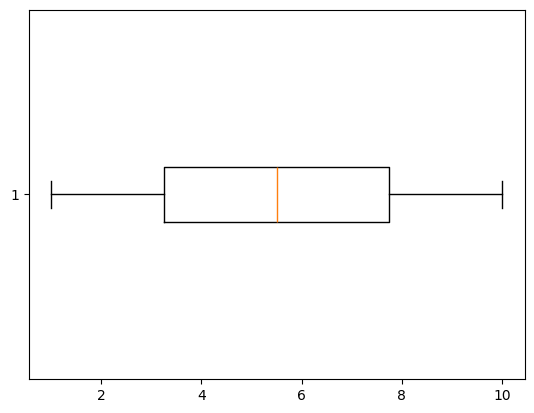

In [30]:
plt.boxplot(data, orientation="horizontal")
plt.show()

In [29]:
print("X_train:")
print(np.mean(X_train[:, 0]), np.mean(X_train[:,0]))
print(np.mean(X_train[:,1]), np.std(X_test[:,1])) # std = standard deviation, measures the spread of the data
# lower std means data is packed together
# higher std means data is more spread out

X_train:
-2.1576074260565293e-15 -2.1576074260565293e-15
-8.206768598029158e-16 1.0300465660490241
